# Machine Learning Project - Predictive Statistics - 50pts

Kathia Zamora Arias <kattia.zamora@prodigious.com><br />
Alejandro Madrigal Leival <me@alemadlei.tech>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.spatial.distance import cdist
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import Normalizer, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Description
# LIMIT_BAL: Credit in Taiwan dollars.
# SEX: 
#   1 => Male
#   2 => Female
# EDUCATION: 
#   1 => Graduate School
#   2 => University
#   3 => High School
#   4 => Others
# MARRIAGE:
#   1 => Married
#   2 => Single
#   3 => Other
# AGE: Age
# PAY_0: Payment status for September 2005
# PAY_2: Payment status for August 2005
# PAY_3: Payment status for July 2005
# PAY_4: Payment status for June 2005
# PAY_5: Payment status for May 2005
# PAY_6: Payment status for April 2005
# - All of these have the following possible values
#   -1 => Pay duly
#    1 => One month payment delay
#    2 => Two months payment delay
#    . => . months payment delay
#    9 => Nine months or month payment delay.
# BILL_AMT1: Bill statement amount for September 2005.
# BILL_AMT2: Bill statement amount for August 2005.
# BILL_AMT3: Bill statement amount for July 2005.
# BILL_AMT4: Bill statement amount for June 2005.
# BILL_AMT5: Bill statement amount for May 2005.
# BILL_AMT6: Bill statement amount for April 2005.
# - All of these values are in Taiwan dollars.
# PAY_AMT1: Amount of previous payment for September 2005.
# PAY_AMT2: Amount of previous payment for August 2005.
# PAY_AMT3: Amount of previous payment for July 2005.
# PAY_AMT4: Amount of previous payment for June 2005.
# PAY_AMT5: Amount of previous payment for May 2005.
# PAY_AMT6: Amount of previous payment for April 2005.
# default payment next month: Indicates if the next month (October 2005) will be a default payment month.

# Loads and cleans up our dataset (first row in this case is the second one).
data = pd.read_csv('default_credit.csv', header=1);
data = data.astype('int32')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 1 - Can we cluster our customers into categories? (unlabeled clustering) - (10 pts)

In [3]:
# As our data is not labeled in any way that would allows us to classify the people, we will attempt to
# figure this out by using KMeans.

# We get the data use to infere the clusters.
y = data['default payment next month'];
X = data.drop(['default payment next month', 'ID'], axis=1)

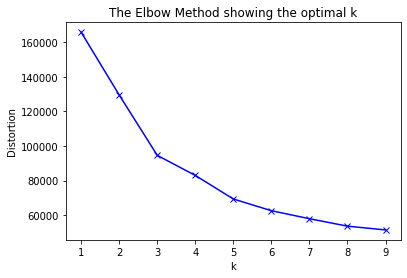

In [4]:
# Uses PCA to transform data.
pca = decomposition.PCA(n_components = 2)
pca.fit(X)
X = pca.transform(X)

# Gets the clusters groups to plot and figure out the best number of clusters to use.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

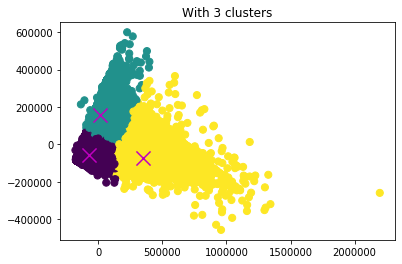

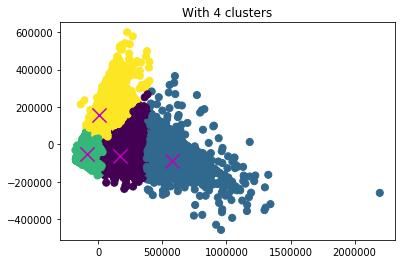

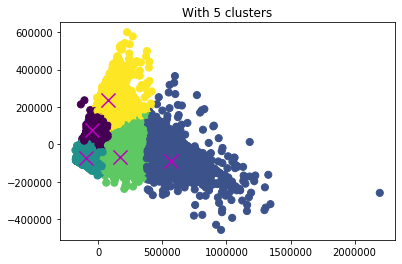

In [5]:
# Lets compare the groupings that could be used as elbows.
for i in range(3, 6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    predict = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    
    plt.title('With ' + str(i) + ' clusters')
    plt.scatter(X[ : , 0], X[ : , 1], s=50, c=predict)
    plt.scatter(centroids[ : , 0], centroids[ : , 1], s = 200, marker='x', c = 'm')
    plt.show()

#### Based on the data, we feel that 5 clusters is something that resembles the data we have with a good accuracy.

### 2 - Can cluster categories serve to predict payment defaults? – (10 pts)

In [6]:
# Will iterate over cluster variations...
for i in range(3, 6):

    print ('Evaluation scores for', str(i), 'clusters.')
    kmeans_model_cross_val = KMeans(n_clusters=i)

    # Cross validates data 
    scores = cross_val_score(kmeans_model_cross_val, X, y, scoring='neg_mean_squared_error', cv=10)
    print('Cross-validated scores:', -scores)

    predictions = cross_val_predict(kmeans_model_cross_val, X, y, cv=10)
    accuracy = metrics.r2_score(y, predictions)
    print('Cross-Predicted Accuracy:', -accuracy)
    print('================================')

Evaluation scores for 3 clusters.
Cross-validated scores: [1.17333333 1.44966667 1.44566667 0.75533333 2.08766667 1.25766667
 2.07633333 2.01333333 1.382      2.02633333]
Cross-Predicted Accuracy: 6.678232039956992
Evaluation scores for 4 clusters.
Cross-validated scores: [1.65066667 2.554      1.11666667 1.082      1.76833333 5.20933333
 3.07833333 2.41966667 4.215      1.55566667]
Cross-Predicted Accuracy: 14.429991829906012
Evaluation scores for 5 clusters.
Cross-validated scores: [3.32       5.28633333 5.89333333 5.033      5.15766667 4.033
 4.9        5.92633333 4.84333333 7.687     ]
Cross-Predicted Accuracy: 29.129543511864902


#### Based on the data, our initial assumption that 5 clusters better represents the data seems to be valid, as it is the one with the highest score. However, because it is so low, we can confirm that using clusters to attempt to predict payment default is not going to provide any help at all.

### 3 - Can a classification algorithm be used to predict payment defaults based on the default data? (try as many ML algorithms as needed used in the class) - (25 pts)

#### Before we do anything, we will clean up the data.

In [7]:
# Clear all attributes that are not helpful to identify default payments.
columns_to_remove = ['ID', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
evaluation_X = data.drop(columns_to_remove, axis=1)

# Result.
evaluation_y = data['default payment next month'];

# Change invalid marriage values to "Other"
evaluation_X.loc[evaluation_X.MARRIAGE == 0, 'MARRIAGE'] = 3

# Change invalid education values to "Other"
evaluation_X.loc[evaluation_X.EDUCATION == 0, 'EDUCATION'] = 4
evaluation_X.loc[evaluation_X.EDUCATION == 5, 'EDUCATION'] = 4
evaluation_X.loc[evaluation_X.EDUCATION == 6, 'EDUCATION'] = 4


In [23]:
# Gets train and test data.
X_train, X_test, y_train, y_test = train_test_split(evaluation_X, y, train_size=0.65, random_state=10)

# Transforms the data with a normalizer.
normd = Normalizer().fit(X_train)
X_norm_train = normd.transform(X_train)
X_norm_test = normd.transform(X_test)
X_norm = normd.transform(evaluation_X)
X_norm_train = pd.DataFrame(X_norm_train, columns=list(evaluation_X))
X_norm_test = pd.DataFrame(X_norm_test, columns=list(evaluation_X))
X_norm = pd.DataFrame(X_norm, columns=list(evaluation_X))

# Transforms the data with a scaler.
scaled = MinMaxScaler().fit(X_train)
X_scaled_train = scaled.transform(X_train)
X_scaled_test = scaled.transform(X_test)
X_scaled = scaled.transform(evaluation_X)
X_scaled_train = pd.DataFrame(X_scaled_train, columns=list(evaluation_X))
X_scaled_test = pd.DataFrame(X_scaled_test, columns=list(evaluation_X))
X_scaled = pd.DataFrame(X_scaled, columns=list(evaluation_X))

In [24]:
# Uses PCA to transform data. We use this because there are no category labels available.
pca = decomposition.PCA(n_components = 2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

pca_norm = decomposition.PCA(n_components = 2)
pca_norm.fit(X_norm_train)
X_norm_train = pca_norm.transform(X_norm_train)
X_norm_test = pca_norm.transform(X_norm_test)

pca_scaled = decomposition.PCA(n_components = 2)
pca_scaled.fit(X_scaled_train)
X_scaled_train = pca_scaled.transform(X_scaled_train)
X_scaled_test = pca_scaled.transform(X_scaled_test)

#  Logistic regression evaluation
## ===================================================================

In [25]:
from sklearn.linear_model import LogisticRegression
param_grid = {
  'random_state': [None, 2, 10],
  'max_iter': [150], 
  'penalty': ['l2'],
  'C': [1e3, 1e4, 5e4, 1e5],
  'solver': ['lbfgs', 'sag']
}

In [26]:
# Uses grid search with logistic regression to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_pred = gs_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best estimator found in 12.527s:
LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.85      0.44      0.58      8134
           1       0.28      0.74      0.40      2366

    accuracy                           0.51     10500
   macro avg       0.57      0.59      0.49     10500
weighted avg       0.72      0.51      0.54     10500



In [27]:
# Uses grid search with logistic regression to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_norm_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_norm_pred = gs_model.predict(X_norm_test)
print(classification_report(y_test, y_norm_pred))

Best estimator found in 10.519s:
LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      8134
           1       0.00      0.00      0.00      2366

    accuracy                           0.77     10500
   macro avg       0.39      0.50      0.44     10500
weighted avg       0.60      0.77      0.68     10500



/Users/alemadlei/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# Uses grid search with logistic regression to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_scaled_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_scaled_pred = gs_model.predict(X_scaled_test)
print(classification_report(y_test, y_scaled_pred))

Best estimator found in 26.602s:
LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8134
           1       1.00      1.00      1.00      2366

    accuracy                           1.00     10500
   macro avg       1.00      1.00      1.00     10500
weighted avg       1.00      1.00      1.00     10500



#### Though this results are very positive, it could be that the model is "too good to be true", and some overfitting might be happening. We test with the specific instance, and by using all data.


In [14]:
pred = gs_model.best_estimator_.predict(pca_scaled.transform(X_scaled))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     23364
           1       0.72      0.26      0.38      6636

    accuracy                           0.81     30000
   macro avg       0.77      0.61      0.63     30000
weighted avg       0.80      0.81      0.78     30000



#### With all data this seems to work.... however, we still have the feeling that this is too good to be true and that there might be a chance that the model is overfitting.

#  Random Forest Classifier
## ===================================================================

In [15]:
forest_param_grid = {
  'criterion': ['gini'],
  'max_depth': [6],
  'n_estimators': [150],  
}

In [16]:
# Uses grid search with RandomForest to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(RandomForestClassifier(), forest_param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_pred = gs_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best estimator found in 14.998s:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      8134
           1       0.50      0.01      0.01      2366

    accuracy                           0.77     10500
   macro avg       0.64      0.50      0.44     10500
weighted avg       0.71      0.77      0.68     10500



In [17]:
# Uses grid search with RandomForest to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(RandomForestClassifier(), forest_param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_norm_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_pred = gs_model.predict(X_norm_test)
print(classification_report(y_test, y_pred))

Best estimator found in 15.398s:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      8134
           1       0.00      0.00      0.00      2366

    accuracy                           0.77     10500
   macro avg       0.39      0.50      0.44     10500
weighted avg       0.60      0.77      0.68     10500



/Users/alemadlei/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
# Uses grid search with RandomForest to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(RandomForestClassifier(), forest_param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_scaled_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_pred = gs_model.predict(X_scaled_test)
print(classification_report(y_test, y_pred))

Best estimator found in 15.716s:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      8134
           1       0.75      0.44      0.55      2366

    accuracy                           0.84     10500
   macro avg       0.80      0.70      0.73     10500
weighted avg       0.83      0.84      0.82     10500



#  Support Vector Machines Evaluation
## ===================================================================

In [19]:
# We already have all of our data transformed and ready to use.
# Build the parameters
svm_param_grid = {
  'kernel': ['rbf'],
  'gamma': [0.0001, 0.0005, 0.001, 0.005],
  'class_weight': ['balanced']
}

svm_param_grid = {
  'kernel': ['rbf'],
}

In [20]:
# Uses grid search with SVM to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(SVC(cache_size=2048, gamma= 'scale'), svm_param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_pred = gs_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best estimator found in 42.674s:
SVC(C=1.0, cache_size=2048, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      8134
           1       0.00      0.00      0.00      2366

    accuracy                           0.77     10500
   macro avg       0.39      0.50      0.44     10500
weighted avg       0.60      0.77      0.68     10500



/Users/alemadlei/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
# Uses grid search with SVM to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(SVC(cache_size=2048, gamma= 'scale'), svm_param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_norm_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_pred = gs_model.predict(X_norm_test)
print(classification_report(y_test, y_pred))

Best estimator found in 36.379s:
SVC(C=1.0, cache_size=2048, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      8134
           1       0.00      0.00      0.00      2366

    accuracy                           0.77     10500
   macro avg       0.39      0.50      0.44     10500
weighted avg       0.60      0.77      0.68     10500



/Users/alemadlei/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
# Uses grid search with SVM to obtain the best estimator.
t0 = time()
gs_model = GridSearchCV(SVC(cache_size=2048, gamma= 'scale'), svm_param_grid, cv=10, iid=False)
gs_model = gs_model.fit(X_scaled_train, y_train)

# Dislay messages.
print('Best estimator found in %0.3fs:' % (time() - t0))
print(gs_model.best_estimator_)

# Using test set.
y_pred = gs_model.predict(X_scaled_test)
print(classification_report(y_test, y_pred))

Best estimator found in 78.522s:
SVC(C=1.0, cache_size=2048, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      8134
           1       0.71      0.35      0.47      2366

    accuracy                           0.82     10500
   macro avg       0.77      0.66      0.68     10500
weighted avg       0.81      0.82      0.80     10500

